In [15]:
import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import Image
from copy import deepcopy
from itertools import product
from scipy.ndimage import gaussian_filter1d

import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from core.models import DenseClassifier, CNNClassifier
from core.initializers import He, Xavier
from core.optimizers import GradDesc, Momentum, Adagrad, RMSProp, Adam
from core.losses import Crossentropy
from core.activations import ReLu, Softmax
from core.metrics import Precision, Recall

## Считывание данных из бинарных файлов

In [3]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
preproc_path = data_path / "preprocessed"

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


### Обучающая выборка

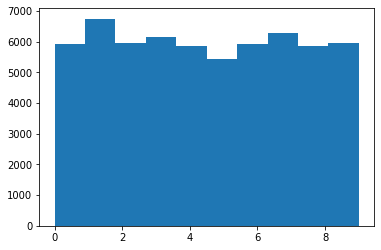

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

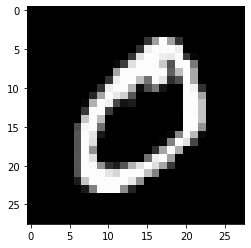

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

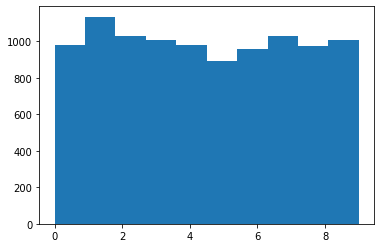

In [6]:
# Метки тестовой выборки
test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
plt.hist(test_labels);

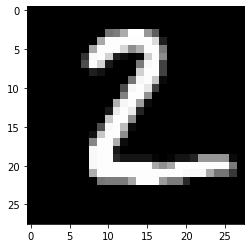

In [7]:
# Изображения тестовой выборки
test_size, rows, columns = 10000, 28, 28
test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
plt.imshow(test_images[1,:,:], cmap='gray')

## Исследование моделей с полносвязными слоями 

In [8]:
n_train = 60000
n_classes = 10
# Обучающая выборка
prepared_labels = train_labels[:n_train]
prepared_images = train_images[:n_train].reshape(n_train, -1)
prepared_images = (prepared_images > 0).astype(np.uint8)
# Тестовая выборка
prepared_t_labels = test_labels
prepared_t_images = test_images.reshape(test_size, -1)
prepared_t_images = (prepared_t_images > 0).astype(np.uint8)

### Обучение моделей

In [9]:
legend = []
models = dict()
loss_histories = dict()
optimisers_hub = {
    "GradDesc": GradDesc(0.01),
    "Momentum": Momentum(learning_rate=0.001, momentum=0.9),
    "Adagrad": Adagrad(0.001),
    "RMSProp": RMSProp(10**(-3), momentum=0.9),
    "Adam": Adam(10**(-3), momentum_1=0.9, momentum_2=0.9)
}
metrics = [Precision(), Recall()]

for is_batch_norm, (label, optimiser) in product([True, False], optimisers_hub.items()):
    title = f"{label} | {is_batch_norm}" 
    print(f"\n{title}")
    # Создадим модель
    models[title] =(
         DenseClassifier(
            input_size=28*28,
            layers_sizes=[64, 32, 10],
            initializers_classes=[He, He, Xavier],
            activations_classes=[ReLu, ReLu, Softmax],
            optimizer=deepcopy(optimiser),
            loss=Crossentropy,
            need_batch_normaliser=is_batch_norm
        )
    )
    # Обучим модель
    loss_histories[title] = models[title].fit(3, 64, prepared_images, prepared_labels, metrics=metrics, l1=10**(-3), l2=10**(-4))


GradDesc | True
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:16<00:00, 46.85it/s]


Mean loss: 0.4300000071525574
Fit scores: Precision 0.93 | Recall 0.9301
Validation scores: Precision 0.9231 | Recall 0.9228
Epoch 2


100%|██████████| 750/750 [00:15<00:00, 48.66it/s]


Mean loss: 0.20999999344348907
Fit scores: Precision 0.9479 | Recall 0.9474
Validation scores: Precision 0.9414 | Recall 0.9412
Epoch 3


100%|██████████| 750/750 [00:14<00:00, 51.31it/s]


Mean loss: 0.17000000178813934
Fit scores: Precision 0.9579 | Recall 0.9582
Validation scores: Precision 0.9526 | Recall 0.9531

Momentum | True
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:15<00:00, 49.94it/s]


Mean loss: 0.4399999976158142
Fit scores: Precision 0.9321 | Recall 0.9325
Validation scores: Precision 0.9309 | Recall 0.9311
Epoch 2


100%|██████████| 750/750 [00:13<00:00, 54.83it/s]


Mean loss: 0.20999999344348907
Fit scores: Precision 0.9506 | Recall 0.9509
Validation scores: Precision 0.9439 | Recall 0.9442
Epoch 3


100%|██████████| 750/750 [00:15<00:00, 48.73it/s]


Mean loss: 0.17000000178813934
Fit scores: Precision 0.9584 | Recall 0.9586
Validation scores: Precision 0.9528 | Recall 0.9527

Adagrad | True
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:19<00:00, 37.73it/s]


Mean loss: 0.8100000023841858
Fit scores: Precision 0.8808 | Recall 0.8798
Validation scores: Precision 0.8791 | Recall 0.8788
Epoch 2


100%|██████████| 750/750 [00:20<00:00, 36.19it/s]


Mean loss: 0.5299999713897705
Fit scores: Precision 0.9013 | Recall 0.901
Validation scores: Precision 0.9015 | Recall 0.9022
Epoch 3


100%|██████████| 750/750 [00:19<00:00, 37.98it/s]


Mean loss: 0.44999998807907104
Fit scores: Precision 0.9119 | Recall 0.9118
Validation scores: Precision 0.9151 | Recall 0.9152

RMSProp | True
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:20<00:00, 36.24it/s]


Mean loss: 0.3400000035762787
Fit scores: Precision 0.9433 | Recall 0.9429
Validation scores: Precision 0.9413 | Recall 0.9409
Epoch 2


100%|██████████| 750/750 [00:21<00:00, 35.54it/s]


Mean loss: 0.20000000298023224
Fit scores: Precision 0.9503 | Recall 0.9506
Validation scores: Precision 0.9412 | Recall 0.9413
Epoch 3


100%|██████████| 750/750 [00:20<00:00, 37.39it/s]


Mean loss: 0.1899999976158142
Fit scores: Precision 0.9509 | Recall 0.9505
Validation scores: Precision 0.9475 | Recall 0.9472

Adam | True
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:21<00:00, 35.39it/s]


Mean loss: 0.3499999940395355
Fit scores: Precision 0.9467 | Recall 0.9461
Validation scores: Precision 0.9441 | Recall 0.9435
Epoch 2


100%|██████████| 750/750 [00:20<00:00, 36.01it/s]


Mean loss: 0.20000000298023224
Fit scores: Precision 0.9553 | Recall 0.9552
Validation scores: Precision 0.9499 | Recall 0.9498
Epoch 3


100%|██████████| 750/750 [00:21<00:00, 34.99it/s]


Mean loss: 0.18000000715255737
Fit scores: Precision 0.9547 | Recall 0.9548
Validation scores: Precision 0.9497 | Recall 0.9499

GradDesc | False
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:08<00:00, 89.77it/s] 


Mean loss: 1.5800000429153442
Fit scores: Precision 0.804 | Recall 0.7993
Validation scores: Precision 0.8089 | Recall 0.8051
Epoch 2


100%|██████████| 750/750 [00:07<00:00, 97.11it/s] 


Mean loss: 0.5899999737739563
Fit scores: Precision 0.8568 | Recall 0.8526
Validation scores: Precision 0.8612 | Recall 0.8579
Epoch 3


100%|██████████| 750/750 [00:08<00:00, 91.67it/s] 


Mean loss: 0.4699999988079071
Fit scores: Precision 0.8731 | Recall 0.872
Validation scores: Precision 0.8712 | Recall 0.8701

Momentum | False
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:08<00:00, 85.64it/s] 


Mean loss: 1.649999976158142
Fit scores: Precision 0.792 | Recall 0.7906
Validation scores: Precision 0.7961 | Recall 0.7954
Epoch 2


100%|██████████| 750/750 [00:08<00:00, 87.39it/s] 


Mean loss: 0.6100000143051147
Fit scores: Precision 0.8621 | Recall 0.86
Validation scores: Precision 0.8662 | Recall 0.8638
Epoch 3


100%|██████████| 750/750 [00:08<00:00, 83.57it/s] 


Mean loss: 0.46000000834465027
Fit scores: Precision 0.8754 | Recall 0.8743
Validation scores: Precision 0.8755 | Recall 0.8747

Adagrad | False
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:15<00:00, 48.55it/s]


Mean loss: 1.3899999856948853
Fit scores: Precision 0.7959 | Recall 0.7784
Validation scores: Precision 0.7964 | Recall 0.7782
Epoch 2


100%|██████████| 750/750 [00:13<00:00, 57.60it/s]


Mean loss: 0.8600000143051147
Fit scores: Precision 0.8272 | Recall 0.8175
Validation scores: Precision 0.8315 | Recall 0.822
Epoch 3


100%|██████████| 750/750 [00:14<00:00, 53.20it/s]


Mean loss: 0.7200000286102295
Fit scores: Precision 0.8408 | Recall 0.8352
Validation scores: Precision 0.846 | Recall 0.8394

RMSProp | False
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:14<00:00, 51.43it/s]


Mean loss: 0.5699999928474426
Fit scores: Precision 0.8898 | Recall 0.8879
Validation scores: Precision 0.8846 | Recall 0.8824
Epoch 2


100%|██████████| 750/750 [00:13<00:00, 53.89it/s]


Mean loss: 0.36000001430511475
Fit scores: Precision 0.9028 | Recall 0.9014
Validation scores: Precision 0.9026 | Recall 0.9017
Epoch 3


100%|██████████| 750/750 [00:14<00:00, 52.31it/s]


Mean loss: 0.3199999928474426
Fit scores: Precision 0.9155 | Recall 0.914
Validation scores: Precision 0.9158 | Recall 0.9139

Adam | False
By epoch progress
Epoch 1


100%|██████████| 750/750 [00:14<00:00, 53.26it/s]


Mean loss: 0.6100000143051147
Fit scores: Precision 0.8889 | Recall 0.886
Validation scores: Precision 0.8927 | Recall 0.8889
Epoch 2


100%|██████████| 750/750 [00:14<00:00, 53.39it/s]


Mean loss: 0.36000001430511475
Fit scores: Precision 0.9048 | Recall 0.9037
Validation scores: Precision 0.9054 | Recall 0.904
Epoch 3


100%|██████████| 750/750 [00:15<00:00, 49.97it/s]


Mean loss: 0.3100000023841858
Fit scores: Precision 0.9141 | Recall 0.9107
Validation scores: Precision 0.9114 | Recall 0.9086


### Сравнение моделей при обучении

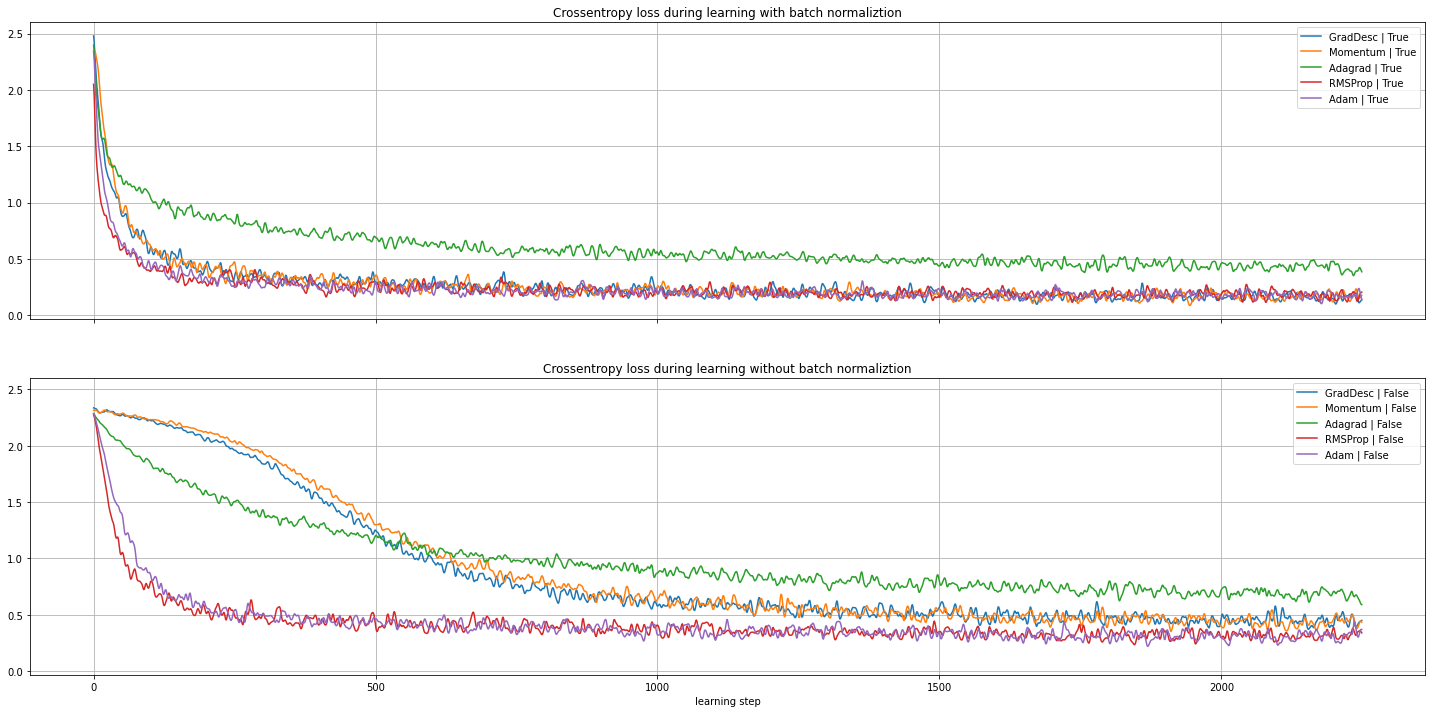

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(25,12))
legend = [[],[]]

for label, loss in loss_histories.items():
    ind = 0 if "True" in label else 1
    curve = gaussian_filter1d(loss.flatten(), sigma=2)
    legend[ind].append(label)
    ax[ind].plot(curve)
for i in range(2):
    ax[i].grid()
    ax[i].legend(legend[i])
    if i < 1:
        ax[i].set_title("Crossentropy loss during learning with batch normaliztion");
    else:
        ax[i].set_title("Crossentropy loss during learning without batch normaliztion");
plt.xlabel("learning step");

### Сравнение метрик моделей на тесте

In [10]:
scores = []
for title, model in models.items(): 
    optimiser, is_batch_norm = title.split(" | ")
    is_batch_norm = True if is_batch_norm == "True" else False
    test_prediction = model.predict(prepared_t_images)
    for m in metrics:
        tmp_dict = {"Optimiser": optimiser,
                "Is batch norm": "Use" if is_batch_norm else "Not use"}
        tmp_dict["Metric"] = m.__class__.__name__
        tmp_dict["Score"] = (
            round(m.calc(prepared_t_labels, test_prediction), 4)
        )    
        scores.append(tmp_dict)

In [17]:
scores_df = pd.DataFrame(scores)
scores_df.sort_values(by=["Score"], inplace=True)
fig = px.scatter(
    scores_df,
    x="Optimiser",
    y="Is batch norm",
    facet_row="Metric",
    color="Score",
    template="plotly_dark",
    title="Models test scores",
    size="Score",
)

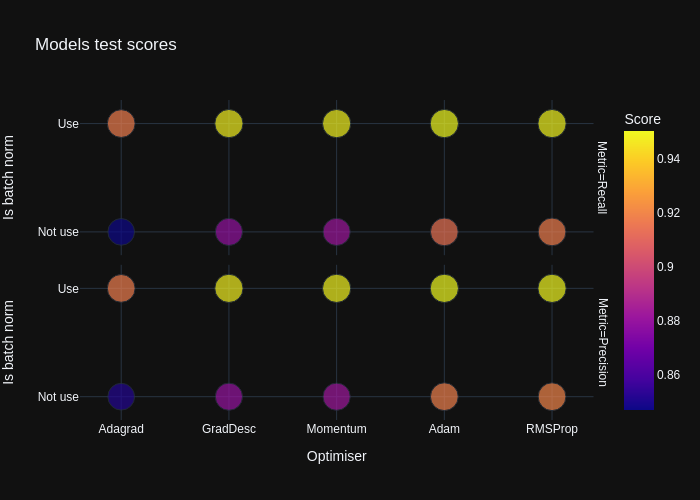

In [18]:
Image(fig.to_image(format="png"))

## Исследование модели со сверточными слоями

In [8]:
n_train = 40000
n_classes = 10
# Обучающая выборка
prepared_labels = train_labels[:n_train]
prepared_images = np.expand_dims(train_images[:n_train], axis=-1)
prepared_images = (prepared_images > 0).astype(np.uint8)
# Тестовая выборка
prepared_t_labels = test_labels
prepared_t_images = np.expand_dims(test_images, axis=-1)
prepared_t_images = (prepared_t_images > 0).astype(np.uint8)

### Обучение модели

In [10]:

metrics = [Precision(), Recall()]
model_cnn =(
        CNNClassifier(
        input_shape=(28, 28),
        optimizer=Adam(10**(-2), momentum_1=0.9, momentum_2=0.9),
        loss=Crossentropy,
    )
)
# Обучим модель
loss_cnn = model_cnn.fit(3, 64, prepared_images, prepared_labels, metrics=metrics, val_part=0.2, l1=10**(-3), l2=10**(-4))

32000 64
By epoch progress
Epoch 1


100%|██████████| 500/500 [19:04<00:00,  2.29s/it]


Mean loss: 0.3799999952316284


100%|██████████| 500/500 [16:17<00:00,  1.95s/it]


Fit scores: Precision 0.9062 | Recall 0.9038


100%|██████████| 125/125 [04:04<00:00,  1.96s/it]


Validation scores: Precision 0.8937 | Recall 0.8914
Epoch 2


100%|██████████| 500/500 [18:56<00:00,  2.27s/it]


Mean loss: 0.3100000023841858


100%|██████████| 500/500 [16:46<00:00,  2.01s/it]


Fit scores: Precision 0.9181 | Recall 0.9163


100%|██████████| 125/125 [04:07<00:00,  1.98s/it]


Validation scores: Precision 0.9094 | Recall 0.9073
Epoch 3


100%|██████████| 500/500 [18:47<00:00,  2.26s/it]


Mean loss: 0.30000001192092896


100%|██████████| 500/500 [16:15<00:00,  1.95s/it]


Fit scores: Precision 0.915 | Recall 0.9144


100%|██████████| 125/125 [04:08<00:00,  1.99s/it]

Validation scores: Precision 0.9093 | Recall 0.9093


### Характеристики на обучении

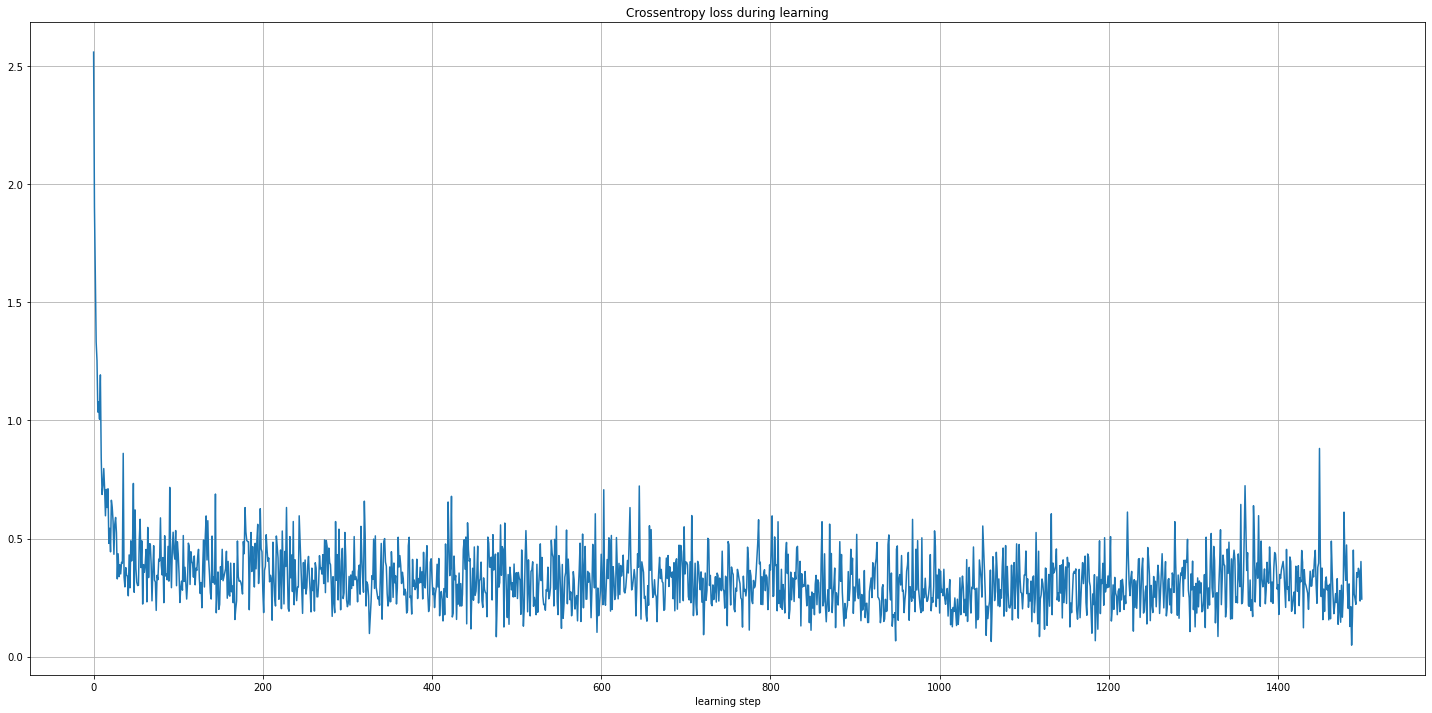

In [11]:
plt.figure(figsize=(25,12))
plt.plot(loss_cnn.flatten())
plt.grid()
plt.title("Crossentropy loss during learning");
plt.xlabel("learning step");

### Метрики на тесте

In [12]:
test_prediction = model_cnn.predict(prepared_t_images)
for m in metrics:
    print(f"{m.__class__.__name__} {round(m.calc(prepared_t_labels, test_prediction), 4)}")    

100%|██████████| 157/157 [05:06<00:00,  1.95s/it]

Precision 0.9175
Recall 0.9166
